<a href="https://colab.research.google.com/github/ThisIsJorgeLima/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-intermediate-linear-algebra/JAL_Nov_12__LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [12]:
# Total Sales
sales = np.array([3505,2400,3027,2798,3700,3250,2689])

# mean
def mean(samp):
  return sum(samp)/len(samp)
# variance
def variance(samp):
  return sum([(i - mean(samp))**2 for i in samp])/(len(samp)-1)
# standard deviation 
def std(samp):
  return math.sqrt(variance(samp))

# function at work:
# mean
print('The mean of total sales is:', mean(sales))
print('The numpy mean of total sales is:', np.mean(sales))
# numpy dot rpduct
print("------------------------------------------------------------")

# variance
print('The variance of sales is:', variance(sales))
print('The numpy variance of sales is:', np.var(sales, ddof=1))
print("------------------------------------------------------------")

# standard deviation
print('The standard deviation of sales is:', std(sales))
print('The numpy standard deviation of sales is:', np.std(sales, ddof=1))


The mean of total sales is: 3052.714285714286
The numpy mean of total sales is: 3052.714285714286
------------------------------------------------------------
The variance of sales is: 214387.90476190473
The numpy variance of sales is: 214387.90476190473
------------------------------------------------------------
The standard deviation of sales is: 463.0204150595357
The numpy standard deviation of sales is: 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [30]:

customers = np.array([127,80,105,92,120,115,93])

sales_customers = {'sales': sales, 'customers': customers}
df = pd.DataFrame(sales_customers)
np.cov(Sales, Customers, ddof=1)
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


The covariance of sales is: 7604.36

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [34]:
# The standard deviation of customers who entered the store last week:
print('The standard deviation of foot traffic is:', std(Customers))

The standard deviation of foot traffic is: 17.057326313123664


In [32]:
# Correlation between sales & customers:
def r_cof(samp1, samp2):
  return (np.cov(Sales, Customers, ddof=1)/(std(Sales)*(std(Customers))))

print (r_cof(sales, customers))
print('--------------------------------')
np.corrcoef(Sales, Customers)

[[27.14495851  0.96283398]
 [ 0.96283398  0.03683925]]
--------------------------------


array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [55]:
df.corr()

,Sales,Customers
Sales,1.000000,0.962834
Customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [40]:
Titanic = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(Titanic)

df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['sex']= df['sex'].apply({'male':1, 'female':0}.get)
print (df.shape)
df.head()


(1310, 15)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [41]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1305,3.0,0.0,"Zabour, Miss. Thamine",0.0,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",1.0,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,3.0,0.0,"Zakarian, Mr. Ortin",1.0,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1308,3.0,0.0,"Zimmerman, Mr. Leo",1.0,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0
1309,NaN,NaN,NaN,NaN,29.881135,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,0


In [42]:
df.isnull().sum()

pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [43]:
df.describe()

,pclass,survived,sex,age,sibsp,parch,fare,body,has_cabin_number
count,1309.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,2.294882,0.381971,0.644003,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,0.837836,0.486055,0.478997,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,3.000000,0.000000,1.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [44]:
df.dtypes

pclass              float64
survived            float64
name                 object
sex                 float64
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [45]:
# variance-covriance matrix:
df.cov()

,pclass,survived,sex,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,0.050011,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.123090,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
sex,0.050011,-0.123090,0.229438,0.354202,-0.054690,-0.088362,-4.600321,-0.387672,-0.027508
age,-3.954605,-0.314343,0.354202,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-0.054690,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-0.088362,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,-4.600321,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,-0.387672,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,-0.027508,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [46]:
# correlation coefficient matrix: 
df.corr()

,pclass,survived,sex,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,0.124617,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.528693,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
sex,0.124617,-0.528693,1.000000,0.057398,-0.109609,-0.213125,-0.185523,-0.015903,-0.137396
age,-0.366370,-0.050199,0.057398,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.109609,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.213125,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,-0.185523,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,-0.015903,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,-0.137396,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

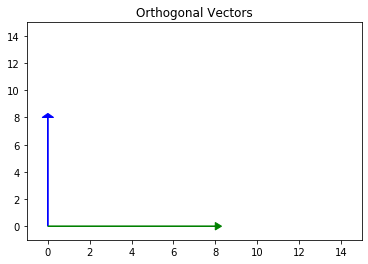

In [84]:
vector_1 = [0,8]
vector_2 = [8,0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1], head_width= .55, head_length=0.30, color= 'blue')
plt.arrow(0,0, vector_2[0], vector_2[1], head_width= .55, head_length=0.30, color= 'g')
plt.xlim(-1,15)
plt.ylim(-1,15)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [85]:
a = [-5,3,7]
b = [6,-8,2]

a = np.array(a)
b = np.array(b)

# numpy dot product
print("The dot product is:", np.dot(a,b))

The dot product is: -40


These two vectors are not orthogonal, because the dot product is -40. If the dot product equal zero then it would be a orthogonal vector. 

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [87]:
# What is the norm of a vector length ||c||^2?
c = np.array([2,-15,6,20])
print('The norm of c^2:',np.linalg.norm(c)**2)

The norm of c^2: 665.0


In [90]:
# What is c dot c?
print('The dot product of c dot c is:',np.dot(c,c))

The dot product of c dot c is: 665


In [100]:
# What is c transpose c?
cT = c.T
print('The transpose of cTc is:', np.matmul(cT, c))

The transpose of cTc is: 665


All are of the same value: 665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}



\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [50]:
f = np.array([4,12,11,9,2])
norm = np.linalg.norm(f)
print('The norm of f is:',norm)

# Lets divide vector by the norm:
f_hat = f/norm
print('The f hat is:', f_hat)

The norm of f is: 19.131126469708992
The f hat is: [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

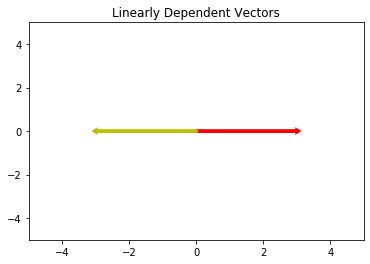

In [65]:
# linearly dependent:

# Axis Bounds
plt.xlim(-5,5)          
plt.ylim(-5,5)

# Orginal Vector
v1 = [3, 0]
v2 = [-3,0]


# Plot Vectors
plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.10, head_length=0.05, color ='r')
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.10, head_length=0.05, color ='y')


plt.title("Linearly Dependent Vectors")
plt.show()

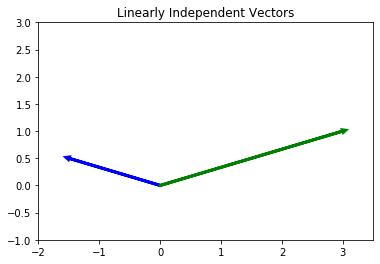

In [68]:
# linearly independent:

# Axis Bounds
plt.xlim(-2,3.5)
plt.ylim(-1,3)

# Original Vector
v2 = [-1.5,.5]
v3 = [3,1]

# Plot Vectors
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='b')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='g')

plt.title("Linearly Independent Vectors")
plt.show()


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = np.array([1,2])
h = np.array([4,8])

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [72]:
span_lmn = np.array([[1,2,3],
                    [-1,0,7],
                    [4,8,2]])
print('The span of {l,m,n} is:', np.linalg.matrix_rank(span_lmn))

The span of {l,m,n} is: 3


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
# Need to review my notes and get back to this. 

## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [73]:
P = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])
print('The Rank of P is:', np.linalg.matrix_rank(P))

The Rank of P is: 3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the dimesnions of the vector within rows and columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

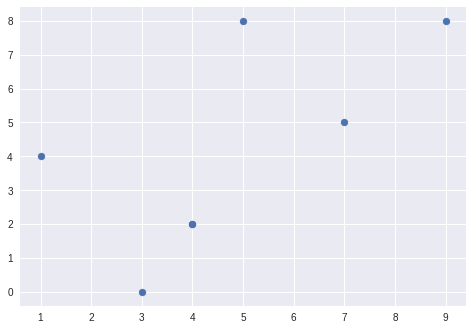

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()